In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedShuffleSplit
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
white = pd.read_csv( "winequality-white.csv", sep = ";" )
red = pd.read_csv( "winequality-red.csv", sep = ";" )

In [3]:
red.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [4]:
white.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

## Look for redundant features

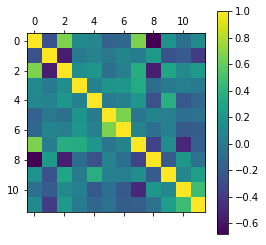

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.114777   0.093705            -0.153794   
volatile acidity            0.001918   0.061298            -0.010504   
citric acid                 0.143577   0.203823            -0.060978   
residual sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free sulfur dioxide         0.187049   0.005562             1.000000   
total sulfur dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   
quality                     0.013732  -0.128907            -0.050656   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile acidity                  0.076470  0.022026  0.234937  -0.260987   
citric acid                       0.035533  0.364947 -0.541904   0.312770   
residual sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free sulfur dioxide               0.667666 -0.021946  0.070377   0.051658   
total sulfur dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   
quality                          -0.185100 -0.174919 -0.057731   0.251397   

                       alcohol   quality  
fixed acidity        -0.061668  0.124052  
volatile acidity     -0.202288 -0.390558  
citric acid           0.109903  0.226373  
residual sugar        0.042075  0.013732  
chlorides            -0.221141 -0.128907  
free sulfur dioxide  -0.069408 -0.050656  
total sulfur dioxide -0.205654 -0.185100  
density              -0.496180 -0.174919  
pH                    0.205633 -0.057731  
sulphates             0.093595  0.251397  
alcohol               1.000000  0.476166  
quality               0.476166  1.000000

In [5]:
plt.matshow( red.corr() )
plt.colorbar()
plt.show()

red.corr()

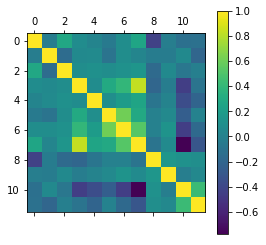

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.022697     0.289181   
volatile acidity          -0.022697          1.000000    -0.149472   
citric acid                0.289181         -0.149472     1.000000   
residual sugar             0.089021          0.064286     0.094212   
chlorides                  0.023086          0.070512     0.114364   
free sulfur dioxide       -0.049396         -0.097012     0.094077   
total sulfur dioxide       0.091070          0.089261     0.121131   
density                    0.265331          0.027114     0.149503   
pH                        -0.425858         -0.031915    -0.163748   
sulphates                 -0.017143         -0.035728     0.062331   
alcohol                   -0.120881          0.067718    -0.075729   
quality                   -0.113663         -0.194723    -0.009209   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.089021   0.023086            -0.049396   
volatile acidity            0.064286   0.070512            -0.097012   
citric acid                 0.094212   0.114364             0.094077   
residual sugar              1.000000   0.088685             0.299098   
chlorides                   0.088685   1.000000             0.101392   
free sulfur dioxide         0.299098   0.101392             1.000000   
total sulfur dioxide        0.401439   0.198910             0.615501   
density                     0.838966   0.257211             0.294210   
pH                         -0.194133  -0.090439            -0.000618   
sulphates                  -0.026664   0.016763             0.059217   
alcohol                    -0.450631  -0.360189            -0.250104   
quality                    -0.097577  -0.209934             0.008158   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                     0.091070  0.265331 -0.425858  -0.017143   
volatile acidity                  0.089261  0.027114 -0.031915  -0.035728   
citric acid                       0.121131  0.149503 -0.163748   0.062331   
residual sugar                    0.401439  0.838966 -0.194133  -0.026664   
chlorides                         0.198910  0.257211 -0.090439   0.016763   
free sulfur dioxide               0.615501  0.294210 -0.000618   0.059217   
total sulfur dioxide              1.000000  0.529881  0.002321   0.134562   
density                           0.529881  1.000000 -0.093591   0.074493   
pH                                0.002321 -0.093591  1.000000   0.155951   
sulphates                         0.134562  0.074493  0.155951   1.000000   
alcohol                          -0.448892 -0.780138  0.121432  -0.017433   
quality                          -0.174737 -0.307123  0.099427   0.053678   

                       alcohol   quality  
fixed acidity        -0.120881 -0.113663  
volatile acidity      0.067718 -0.194723  
citric acid          -0.075729 -0.009209  
residual sugar       -0.450631 -0.097577  
chlorides            -0.360189 -0.209934  
free sulfur dioxide  -0.250104  0.008158  
total sulfur dioxide -0.448892 -0.174737  
density              -0.780138 -0.307123  
pH                    0.121432  0.099427  
sulphates            -0.017433  0.053678  
alcohol               1.000000  0.435575  
quality               0.435575  1.000000

In [6]:
plt.matshow( white.corr() )
plt.colorbar()
plt.show()

white.corr()

In [7]:
def logData( data ):
    
    data["total sulfur dioxide"] = data["total sulfur dioxide"].apply(np.log)
    data["volatile acidity"] = data["volatile acidity"].apply(np.log)
    data["residual sugar"] = data["residual sugar"].apply(np.log)
    data["chlorides"] = data["chlorides"].apply(np.log)
    data["free sulfur dioxide"] = data["free sulfur dioxide"].apply(np.log)
    
    return data


In [8]:
red   = logData( red )
white = logData( white )

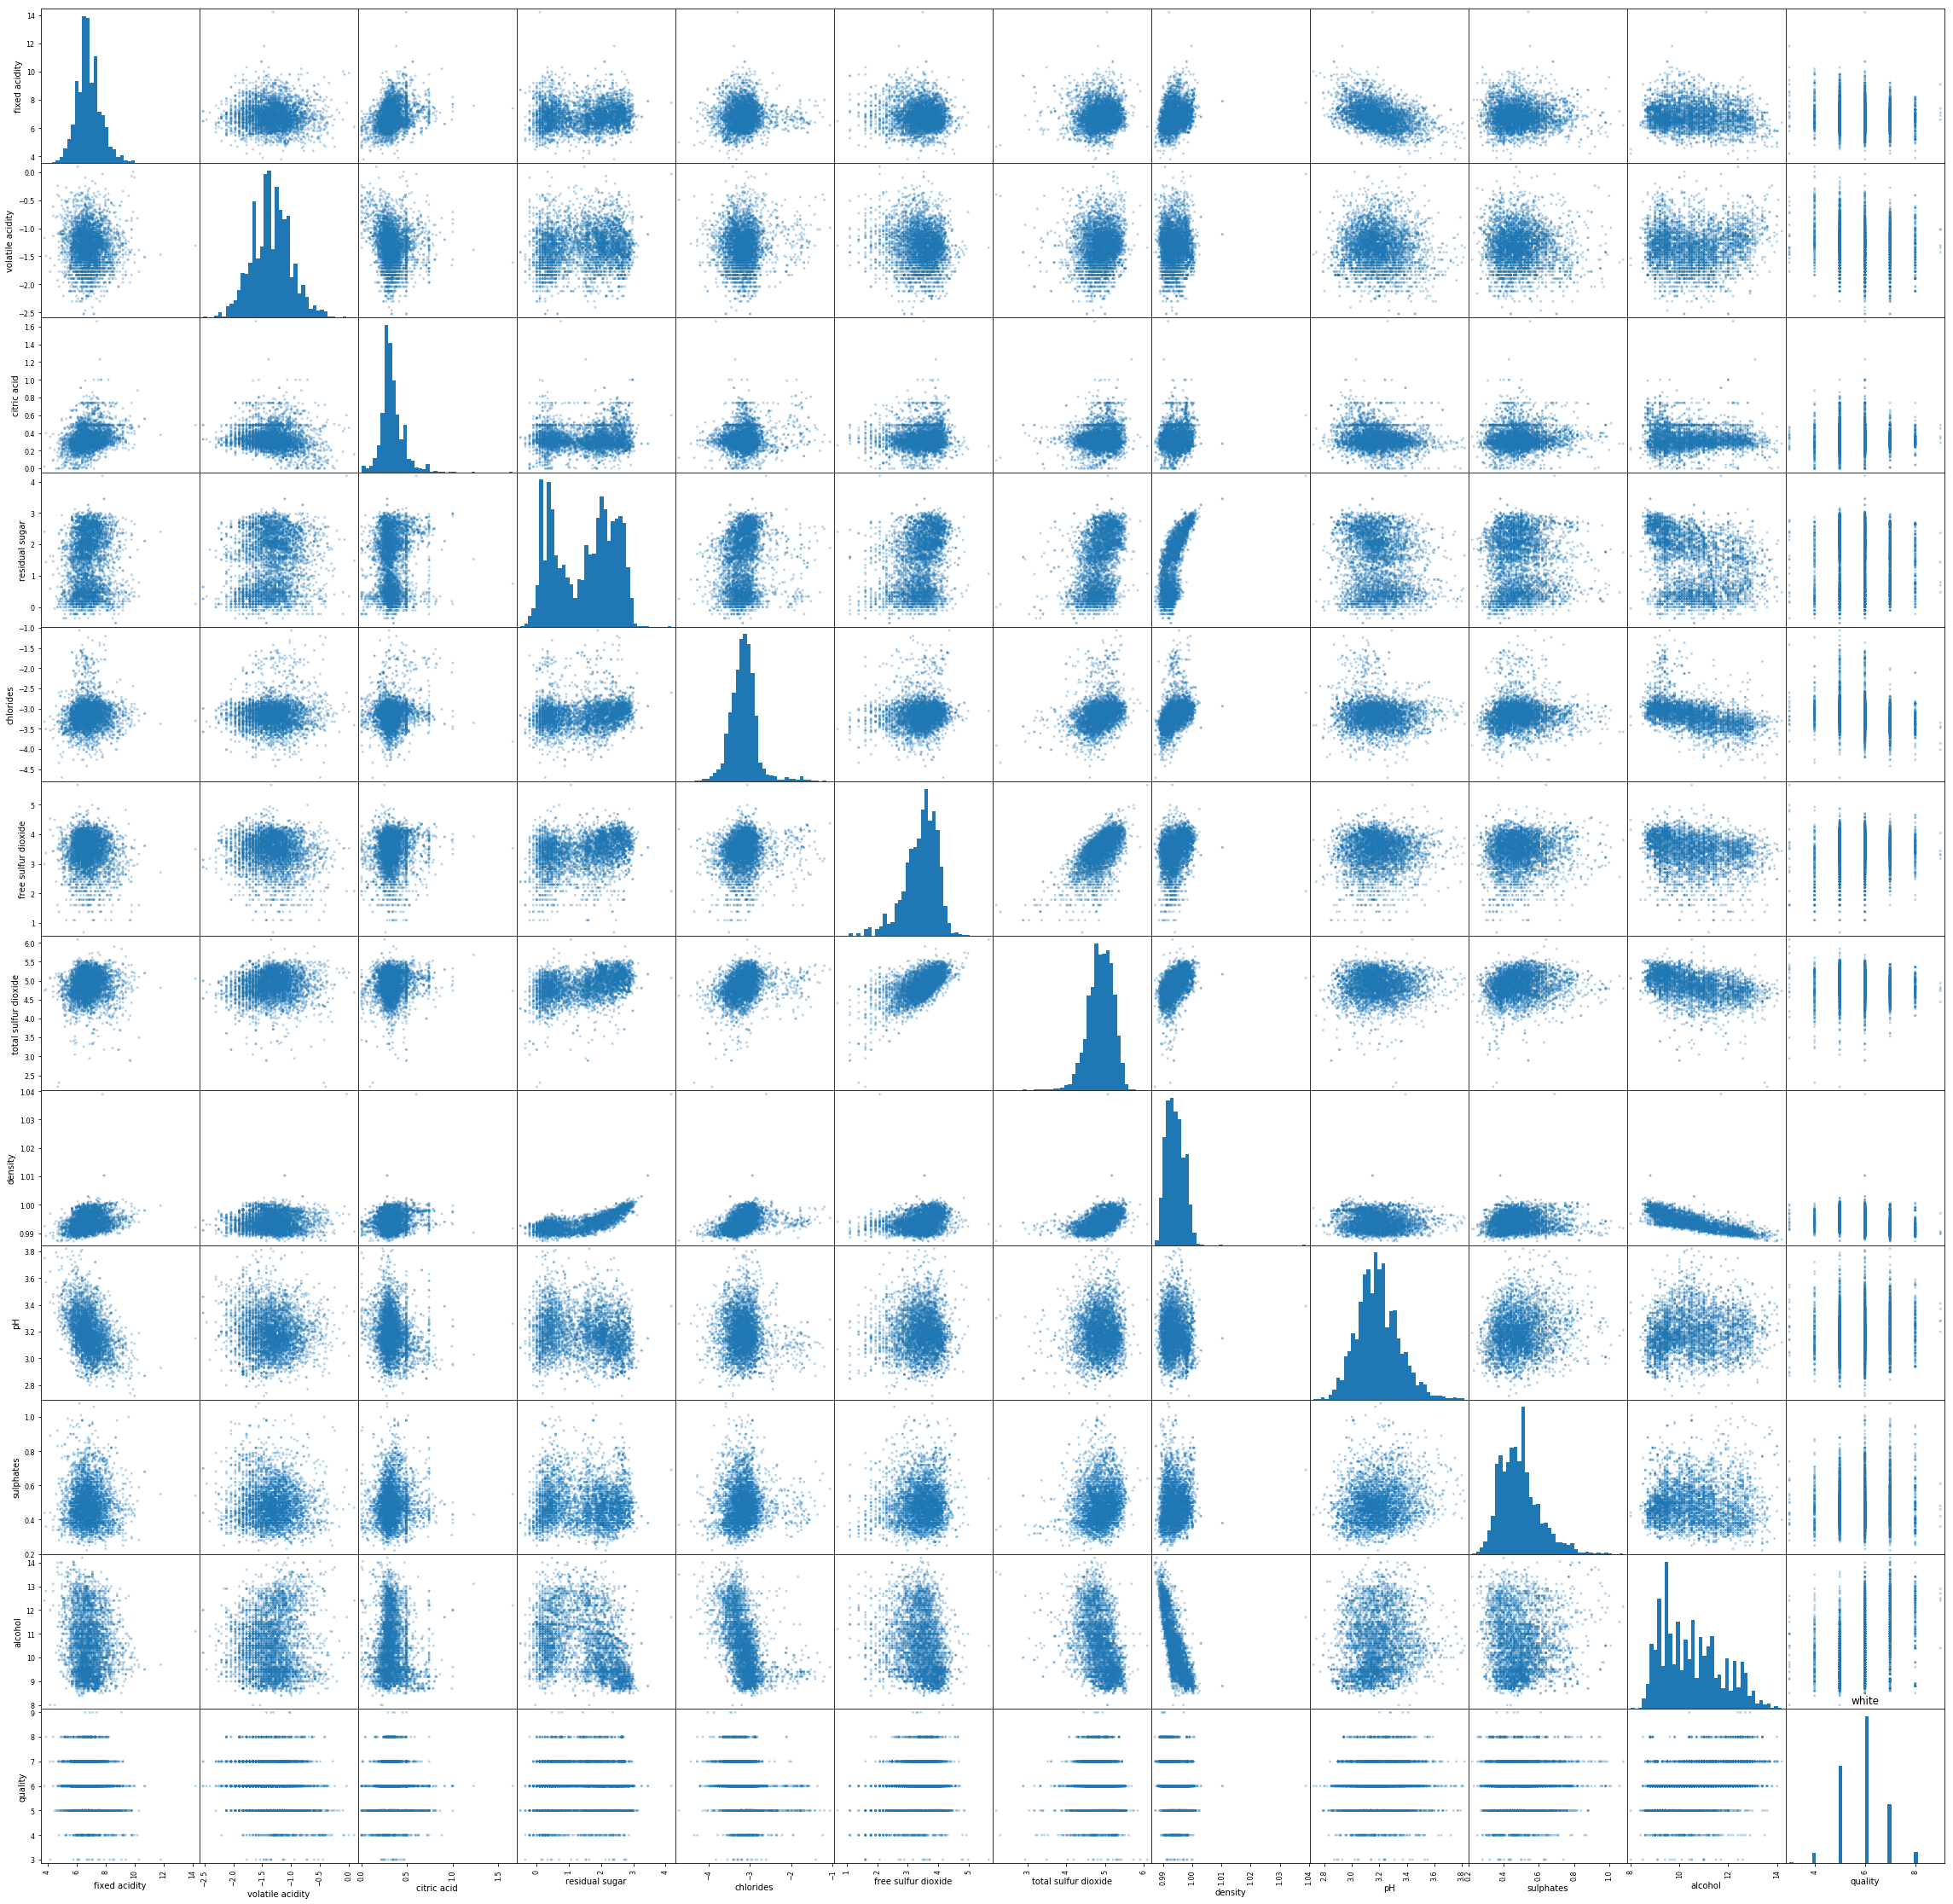

In [9]:
pd.plotting.scatter_matrix( white, figsize=(40,40), alpha = 0.3, hist_kwds = { "bins" : 40} )
plt.title("white")
plt.show()

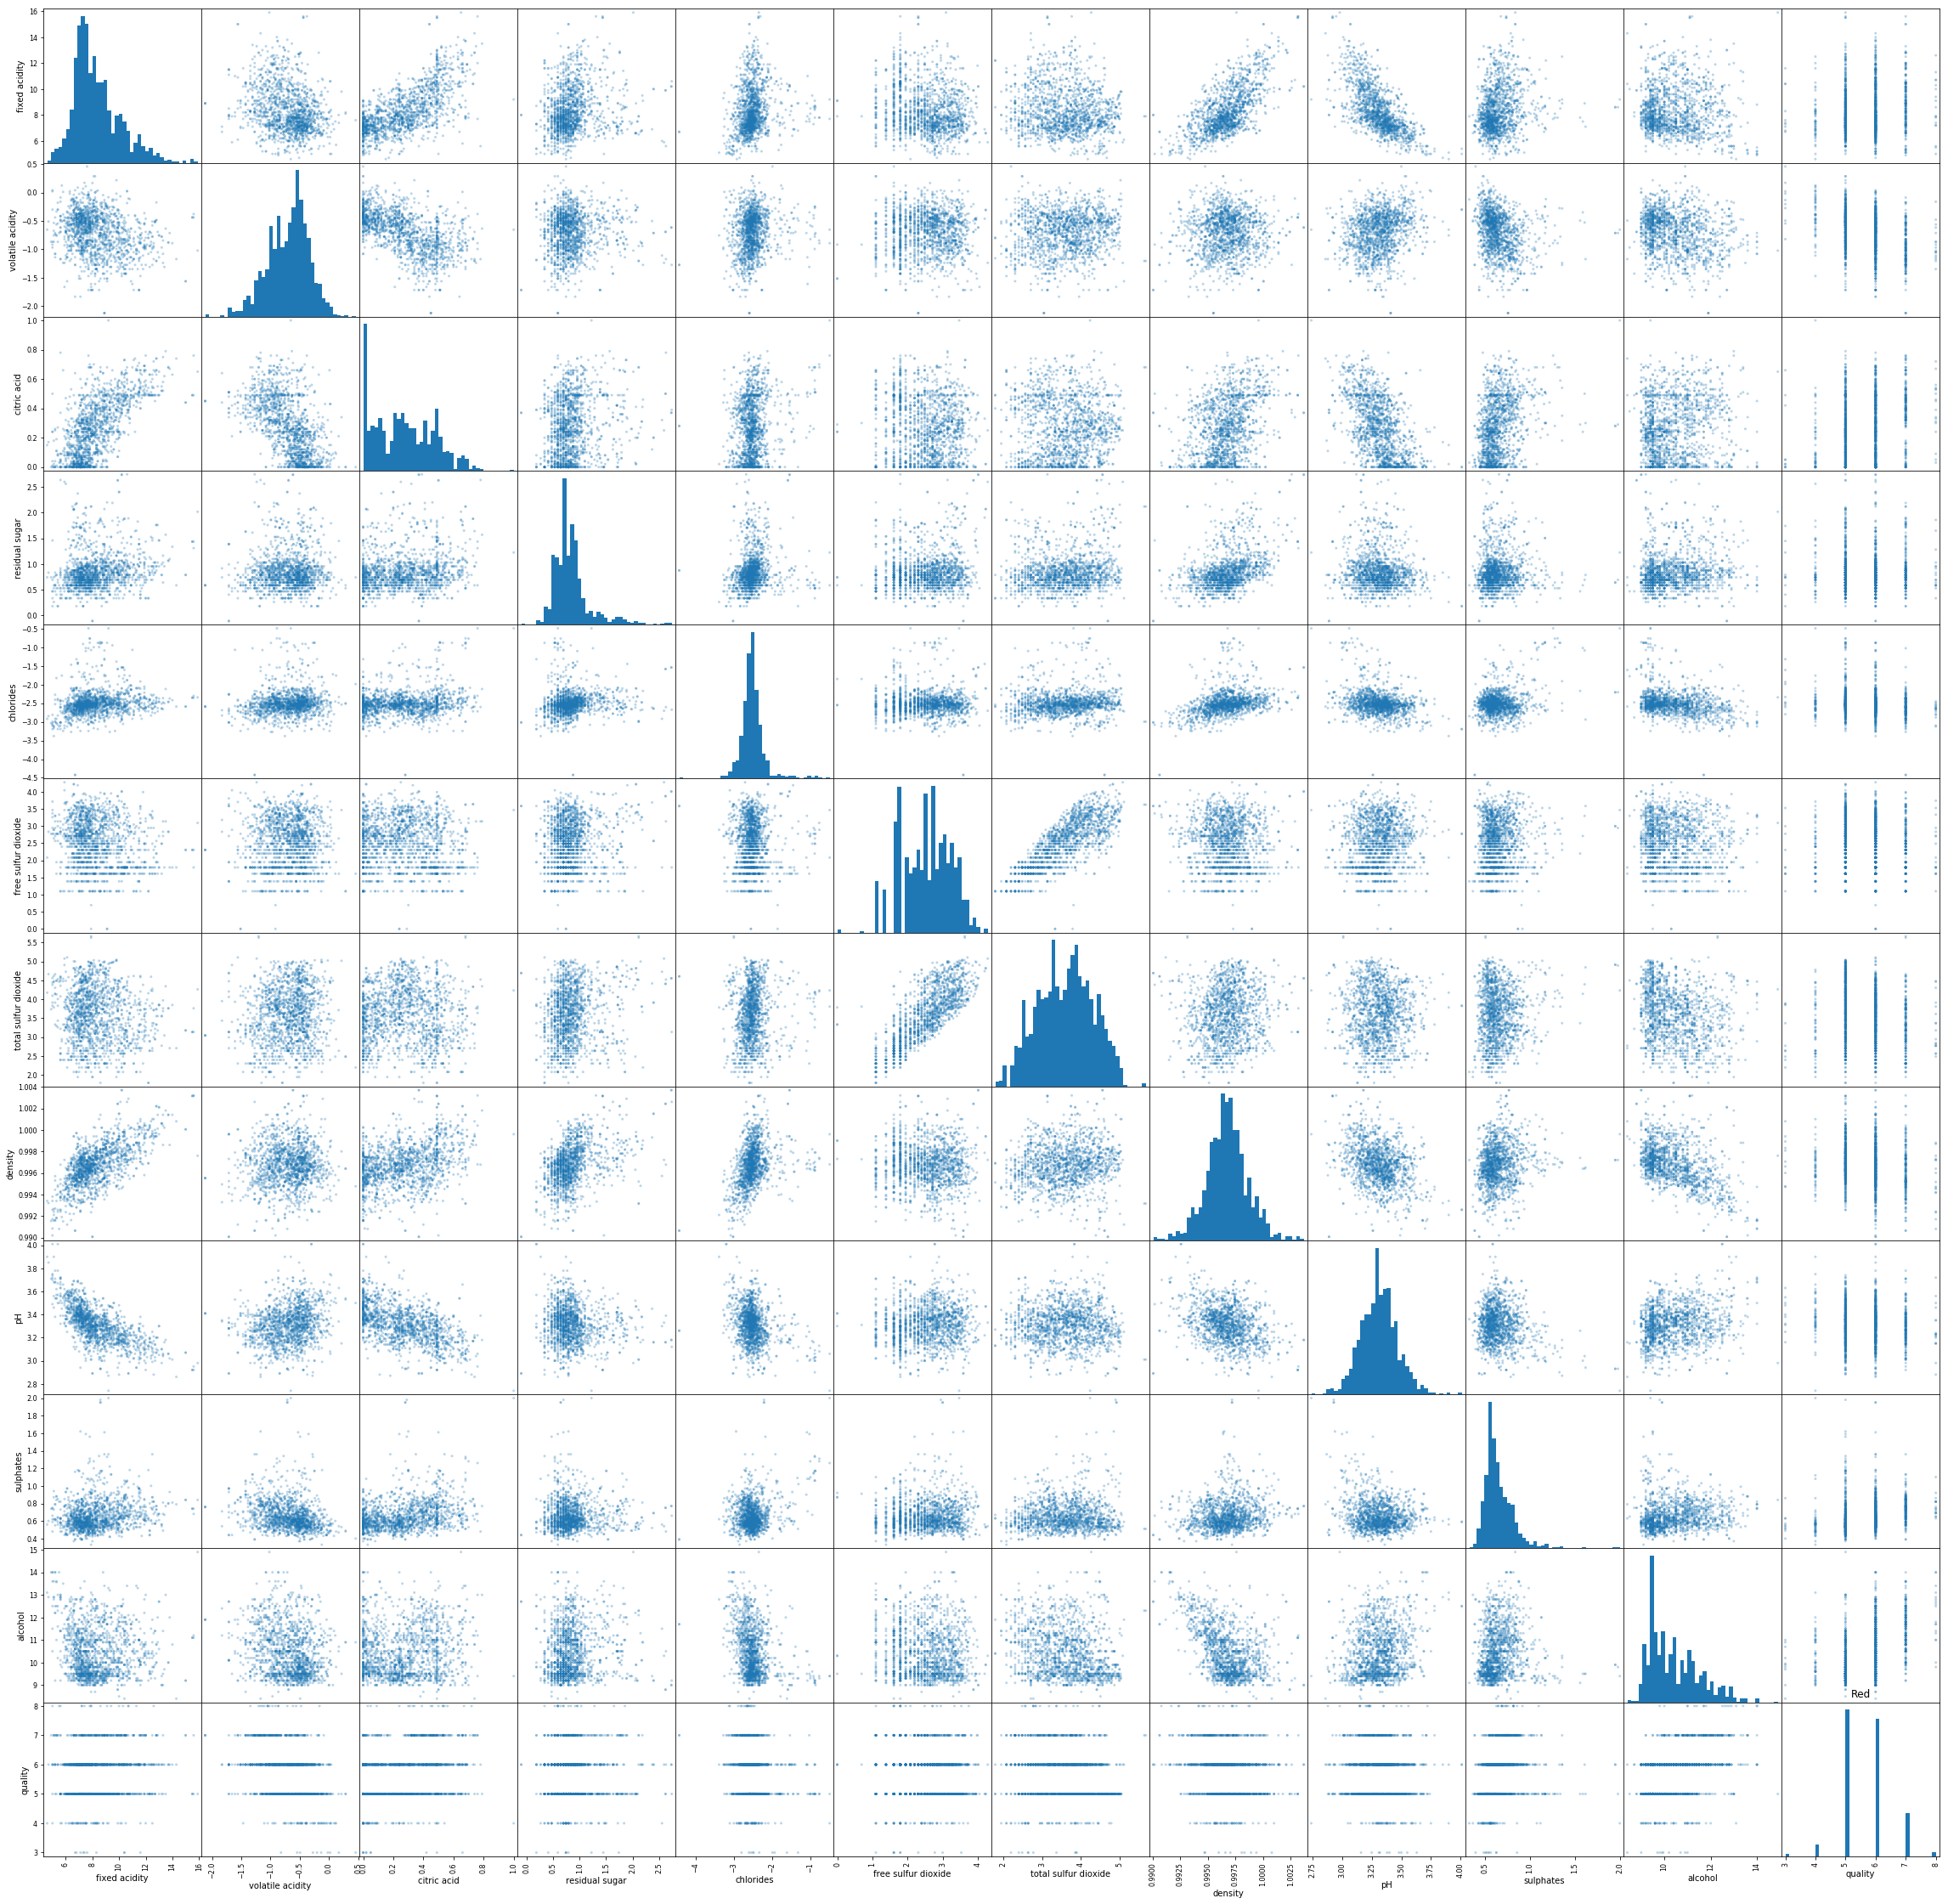

In [10]:
pd.plotting.scatter_matrix( red, figsize=(40,40), alpha = 0.3, hist_kwds = { "bins" : 40} )
plt.title("Red")
plt.show()

## Extract targets and features

In [11]:
redT = red.quality.values
redF = red.drop( "quality", axis = 1 ).values

whiteT = white.quality.values
whiteF = white.drop( "quality", axis = 1 ).values

In [12]:
split = StratifiedShuffleSplit( n_splits = 1, test_size = 0.2, random_state = 1111 )
indTrain, indText = next(split.split( redF, redT ))

xTrainRed, yTrainRed = redF[ indTrain ], redT[ indTrain ]
xTestRed, yTestRed = redF[ indTrain ], redT[ indTrain ]

In [13]:
split = StratifiedShuffleSplit( n_splits = 1, test_size = 0.2, random_state = 1111 )
indTrain, indText = next(split.split( whiteF, whiteT ))

xTrainWhite, yTrainWhite = whiteF[ indTrain ], whiteT[ indTrain ]
xTestWhite, yTestWhite = whiteF[ indTrain ], whiteT[ indTrain ]

## Train red wine model

In [14]:
scalerRed = MinMaxScaler()
xTrainRed = scalerRed.fit_transform( xTrainRed )
xTestRed  = scalerRed.transform( xTestRed )

In [15]:
params = { "C"      : np.logspace( -5, 5, 10 ),
           "degree" : [ 1, 2, 3 ],
           "kernel" : [ "linear", "rbf" ] }

svc = SVC( probability = True )

gridSVC = GridSearchCV( svc, params, cv = 3, n_jobs = -1, verbose = 2 )
gridSVC.fit( xTrainRed, yTrainRed)

Fitting 3 folds for each of 60 candidates, totalling 180 fits
[CV] C=1e-05, degree=1, kernel=linear ................................
[CV] C=1e-05, degree=1, kernel=linear ................................
[CV] C=1e-05, degree=1, kernel=linear ................................
[CV] C=1e-05, degree=1, kernel=rbf ...................................
[CV] C=1e-05, degree=1, kernel=rbf ...................................
[CV] C=1e-05, degree=1, kernel=rbf ...................................
[CV] C=1e-05, degree=2, kernel=linear ................................
[CV] C=1e-05, degree=2, kernel=linear ................................
[CV] ................. C=1e-05, degree=1, kernel=linear, total=   0.1s
[CV] C=1e-05, degree=2, kernel=linear ................................
[CV] ................. C=1e-05, degree=1, kernel=linear, total=   0.1s
[CV] ................. C=1e-05, degree=1, kernel=linear, total=   0.1s
[CV] C=1e-05, degree=2, kernel=rbf ...................................
[CV] C=1e-05, d

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s


[CV] .... C=0.0001291549665014884, degree=3, kernel=rbf, total=   0.3s
[CV] C=0.021544346900318846, degree=1, kernel=linear .................
[CV] .... C=0.0016681005372000592, degree=1, kernel=rbf, total=   0.3s
[CV] C=0.021544346900318846, degree=1, kernel=linear .................
[CV] . C=0.0016681005372000592, degree=3, kernel=linear, total=   0.1s
[CV] C=0.021544346900318846, degree=1, kernel=rbf ....................
[CV] .... C=0.0016681005372000592, degree=2, kernel=rbf, total=   0.3s
[CV] C=0.0016681005372000592, degree=2, kernel=rbf ...................
[CV] .. C=0.021544346900318846, degree=1, kernel=linear, total=   0.1s
[CV] C=0.021544346900318846, degree=1, kernel=linear .................
[CV] .. C=0.021544346900318846, degree=1, kernel=linear, total=   0.1s
[CV] C=0.021544346900318846, degree=1, kernel=rbf ....................
[CV] .... C=0.0016681005372000592, degree=2, kernel=rbf, total=   0.3s
[CV] C=0.021544346900318846, degree=2, kernel=linear .................
[CV] .

[CV] ..... C=3.593813663804626, degree=3, kernel=linear, total=   0.2s
[CV] C=46.41588833612782, degree=2, kernel=linear ....................
[CV] ........ C=3.593813663804626, degree=1, kernel=rbf, total=   0.3s
[CV] C=46.41588833612782, degree=2, kernel=linear ....................
[CV] ........ C=3.593813663804626, degree=3, kernel=rbf, total=   0.3s
[CV] C=3.593813663804626, degree=3, kernel=rbf .......................
[CV] ..... C=46.41588833612782, degree=1, kernel=linear, total=   0.3s
[CV] C=46.41588833612782, degree=1, kernel=rbf .......................
[CV] ..... C=46.41588833612782, degree=1, kernel=linear, total=   0.3s
[CV] C=46.41588833612782, degree=1, kernel=linear ....................
[CV] ........ C=3.593813663804626, degree=2, kernel=rbf, total=   0.3s
[CV] C=46.41588833612782, degree=2, kernel=rbf .......................
[CV] ........ C=3.593813663804626, degree=3, kernel=rbf, total=   0.3s
[CV] C=46.41588833612782, degree=3, kernel=linear ....................
[CV] .

[CV] ................. C=100000.0, degree=1, kernel=rbf, total=  34.7s
[CV] C=100000.0, degree=2, kernel=linear .............................
[CV] ................. C=100000.0, degree=1, kernel=rbf, total=  42.6s
[CV] C=100000.0, degree=2, kernel=linear .............................
[CV] ..... C=7742.636826811277, degree=2, kernel=linear, total= 1.5min
[CV] C=100000.0, degree=2, kernel=rbf ................................
[CV] ..... C=7742.636826811277, degree=1, kernel=linear, total= 1.5min
[CV] C=100000.0, degree=2, kernel=rbf ................................
[CV] ..... C=7742.636826811277, degree=3, kernel=linear, total= 1.5min
[CV] C=100000.0, degree=2, kernel=rbf ................................


[Parallel(n_jobs=-1)]: Done 165 out of 180 | elapsed:  3.6min remaining:   19.5s


[CV] ................. C=100000.0, degree=2, kernel=rbf, total=  35.9s
[CV] C=100000.0, degree=3, kernel=linear .............................
[CV] ................. C=100000.0, degree=2, kernel=rbf, total=  41.1s
[CV] C=100000.0, degree=3, kernel=linear .............................
[CV] ................. C=100000.0, degree=2, kernel=rbf, total=  37.1s
[CV] C=100000.0, degree=3, kernel=linear .............................
[CV] .............. C=100000.0, degree=1, kernel=linear, total= 7.3min
[CV] C=100000.0, degree=3, kernel=rbf ................................
[CV] ................. C=100000.0, degree=3, kernel=rbf, total=  41.9s
[CV] C=100000.0, degree=3, kernel=rbf ................................
[CV] .............. C=100000.0, degree=1, kernel=linear, total= 8.0min
[CV] C=100000.0, degree=1, kernel=linear .............................
[CV] ................. C=100000.0, degree=3, kernel=rbf, total=  34.8s
[CV] C=100000.0, degree=3, kernel=rbf ................................
[CV] .

[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 13.6min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': array([1.00000e-05, 1.29155e-04, 1.66810e-03, 2.15443e-02, 2.78256e-01,
       3.59381e+00, 4.64159e+01, 5.99484e+02, 7.74264e+03, 1.00000e+05]), 'degree': [1, 2, 3], 'kernel': ['linear', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [16]:
gridSVC.best_score_

0.5926505082095387

In [17]:
gridSVC.best_params_

{'C': 7742.636826811277, 'degree': 1, 'kernel': 'rbf'}

In [18]:
modelRed = SVC( probability = True, **gridSVC.best_params_ )
modelRed.fit( xTrainRed, yTrainRed )

SVC(C=7742.636826811277, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Train white wine model

In [19]:
scalerWhite = MinMaxScaler()
xTrainWhite = scalerWhite.fit_transform( xTrainWhite )
xTestWhite  = scalerWhite.transform( xTestWhite )

In [20]:
params = { "C"      : np.logspace( -5, 5, 10 ),
           "degree" : [ 1, 2, 3 ],
           "kernel" : [ "linear", "rbf" ] }

svc = SVC( probability = True )

gridSVC = GridSearchCV( svc, params, cv = 3, n_jobs = -1, verbose = 2 )
gridSVC.fit( xTrainWhite, yTrainWhite )

Fitting 3 folds for each of 60 candidates, totalling 180 fits
[CV] C=1e-05, degree=1, kernel=linear ................................
[CV] C=1e-05, degree=1, kernel=linear ................................
[CV] C=1e-05, degree=1, kernel=linear ................................
[CV] C=1e-05, degree=1, kernel=rbf ...................................
[CV] C=1e-05, degree=1, kernel=rbf ...................................
[CV] C=1e-05, degree=1, kernel=rbf ...................................
[CV] C=1e-05, degree=2, kernel=linear ................................
[CV] C=1e-05, degree=2, kernel=linear ................................
[CV] ................. C=1e-05, degree=1, kernel=linear, total=   1.2s
[CV] C=1e-05, degree=2, kernel=linear ................................
[CV] ................. C=1e-05, degree=1, kernel=linear, total=   1.3s
[CV] C=1e-05, degree=2, kernel=rbf ...................................
[CV] ................. C=1e-05, degree=1, kernel=linear, total=   1.3s
[CV] C=1e-05, d

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.6s


[CV] . C=0.0001291549665014884, degree=3, kernel=linear, total=   1.2s
[CV] C=0.0001291549665014884, degree=3, kernel=rbf ...................
[CV] .... C=0.0001291549665014884, degree=1, kernel=rbf, total=   2.7s
[CV] C=0.0001291549665014884, degree=3, kernel=rbf ...................
[CV] . C=0.0001291549665014884, degree=3, kernel=linear, total=   1.2s
[CV] C=0.0016681005372000592, degree=1, kernel=linear ................
[CV] . C=0.0001291549665014884, degree=3, kernel=linear, total=   1.2s
[CV] C=0.0016681005372000592, degree=1, kernel=linear ................
[CV] .... C=0.0001291549665014884, degree=2, kernel=rbf, total=   2.6s
[CV] C=0.0016681005372000592, degree=1, kernel=linear ................
[CV] .... C=0.0001291549665014884, degree=2, kernel=rbf, total=   2.6s
[CV] C=0.0016681005372000592, degree=1, kernel=rbf ...................
[CV] .... C=0.0001291549665014884, degree=2, kernel=rbf, total=   2.6s
[CV] C=0.0016681005372000592, degree=1, kernel=rbf ...................
[CV] .

[CV] ....... C=0.2782559402207126, degree=2, kernel=rbf, total=   2.8s
[CV] C=3.593813663804626, degree=1, kernel=linear ....................
[CV] ....... C=0.2782559402207126, degree=2, kernel=rbf, total=   2.8s
[CV] C=3.593813663804626, degree=1, kernel=rbf .......................
[CV] ....... C=0.2782559402207126, degree=2, kernel=rbf, total=   2.8s
[CV] C=3.593813663804626, degree=1, kernel=rbf .......................
[CV] ..... C=3.593813663804626, degree=1, kernel=linear, total=   1.3s
[CV] C=3.593813663804626, degree=1, kernel=rbf .......................
[CV] ..... C=3.593813663804626, degree=1, kernel=linear, total=   1.4s
[CV] C=3.593813663804626, degree=2, kernel=linear ....................
[CV] ..... C=3.593813663804626, degree=1, kernel=linear, total=   1.4s
[CV] C=3.593813663804626, degree=2, kernel=linear ....................
[CV] ....... C=0.2782559402207126, degree=3, kernel=rbf, total=   2.9s
[CV] C=3.593813663804626, degree=2, kernel=linear ....................
[CV] .

[CV] ........ C=7742.636826811277, degree=1, kernel=rbf, total=  31.3s
[CV] C=7742.636826811277, degree=2, kernel=linear ....................
[CV] ..... C=599.4842503189421, degree=3, kernel=linear, total= 4.3min
[CV] C=7742.636826811277, degree=2, kernel=linear ....................
[CV] ........ C=7742.636826811277, degree=1, kernel=rbf, total=  27.9s
[CV] C=7742.636826811277, degree=2, kernel=linear ....................
[CV] ........ C=7742.636826811277, degree=1, kernel=rbf, total=  28.3s
[CV] C=7742.636826811277, degree=2, kernel=rbf .......................


[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  5.5min


[CV] ........ C=7742.636826811277, degree=2, kernel=rbf, total=  32.4s
[CV] C=7742.636826811277, degree=2, kernel=rbf .......................
[CV] ........ C=7742.636826811277, degree=2, kernel=rbf, total=  27.2s
[CV] C=7742.636826811277, degree=2, kernel=rbf .......................
[CV] ........ C=7742.636826811277, degree=2, kernel=rbf, total=  28.3s
[CV] C=7742.636826811277, degree=3, kernel=linear ....................
[CV] ..... C=599.4842503189421, degree=3, kernel=linear, total= 3.8min
[CV] C=7742.636826811277, degree=3, kernel=linear ....................
[CV] ..... C=7742.636826811277, degree=1, kernel=linear, total= 9.7min
[CV] C=7742.636826811277, degree=3, kernel=linear ....................
[CV] ..... C=7742.636826811277, degree=1, kernel=linear, total=10.7min
[CV] C=7742.636826811277, degree=3, kernel=rbf .......................
[CV] ..... C=7742.636826811277, degree=2, kernel=linear, total=10.1min
[CV] C=7742.636826811277, degree=3, kernel=rbf .......................
[CV] .

[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 67.5min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': array([1.00000e-05, 1.29155e-04, 1.66810e-03, 2.15443e-02, 2.78256e-01,
       3.59381e+00, 4.64159e+01, 5.99484e+02, 7.74264e+03, 1.00000e+05]), 'degree': [1, 2, 3], 'kernel': ['linear', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [21]:
gridSVC.best_score_

0.5513016845329249

In [22]:
gridSVC.best_params_

{'C': 7742.636826811277, 'degree': 1, 'kernel': 'rbf'}

In [23]:
modelWhite = SVC( probability = True, **gridSVC.best_params_ )
modelWhite.fit( xTrainWhite, yTrainWhite )

SVC(C=7742.636826811277, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Evaluate models on test set

In [25]:
predRed = modelRed.predict( xTestRed )
accRed  = accuracy_score( predRed, yTestRed )

predWhite = modelWhite.predict( xTestWhite )
accWhite  = accuracy_score( predWhite, yTestWhite )

print( f"Test accuracy on red wine dataset: {accRed}" )
print( f"Test accuracy on white wine dataset: {accWhite}" )

Test accuracy on red wine dataset: 0.6903831118060985
Test accuracy on white wine dataset: 0.5834609494640123
